# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json', encoding='utf-8')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [8]:
from matplotlib import pyplot as plt

In [9]:
# 1. Find the 10 countries with most projects

In [10]:
#load json into variable - utf-8 encoding
wb_json_df = pd.read_json('data\world_bank_projects.json', encoding='utf-8')

In [11]:
#printing head to confirm data loaded correctly
wb_json_df.head(3)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en


In [12]:
#print shape to determine dimensioning of dataframe
wb_json_df.shape

(500, 50)

In [13]:
#printing out df info
#confirming what columns have non-null values
#For Q1, any feature with 500 non-null values can be used for aggregating (basing off of the shape from above)
wb_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [14]:
#Group the dataframe by countryname & code - assuming there 
top_10_projects = wb_json_df.groupby(['countryname', 'countrycode']).size().sort_values(ascending=False)

In [15]:
#confirming all rows have been accounting for in above aggregation
top_10_projects.sum()

500

In [16]:
top_10_projects = top_10_projects.head(10)

In [17]:
#confirming no mismatching in countryname and countrycode
wb_json_df.groupby('countryname')['countrycode'].nunique().max()

1

In [18]:
#printing out top 10
top_10_projects.iloc[0:10]

countryname                      countrycode
People's Republic of China       CN             19
Republic of Indonesia            ID             19
Socialist Republic of Vietnam    VN             17
Republic of India                IN             16
Republic of Yemen                RY             13
Nepal                            NP             12
People's Republic of Bangladesh  BD             12
Kingdom of Morocco               MA             12
Africa                           3A             11
Republic of Mozambique           MZ             11
dtype: int64

In [19]:
#list generation to create country code list for graph 
countryname = top_10_projects.index.values
xlabels = [x[1] for x in countryname]
xlabels

['CN', 'ID', 'VN', 'IN', 'RY', 'NP', 'BD', 'MA', '3A', 'MZ']

In [20]:
#extracting y values for graph
yvalues = top_10_projects.get_values()

<BarContainer object of 10 artists>

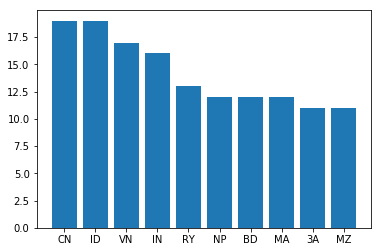

In [21]:
#plotting graph of projects
plt.bar(xlabels, yvalues)

In [22]:
# 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [23]:
#printing out head of target column
top10_themes = wb_json_df['mjtheme_namecode'].head()
top10_themes

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
Name: mjtheme_namecode, dtype: object

In [24]:
#printing out sample from column 
wb_json_df['mjtheme_namecode'][2]

[{'code': '5', 'name': 'Trade and integration'},
 {'code': '2', 'name': 'Public sector governance'},
 {'code': '11', 'name': 'Environment and natural resources management'},
 {'code': '6', 'name': 'Social protection and risk management'}]

In [25]:
#imputting test value into dataframe to determine layout
a = json_normalize(data=wb_json_df['mjtheme_namecode'][0])
type(a)

pandas.core.frame.DataFrame

In [26]:
a.head()

,code,name
0,8,Human development
1,11,


In [27]:
#creating dataframe to append the JSON data
concat_JSON = pd.DataFrame()
#Iterating through the JSON objects
#Appending the normalized rows to a above dataframe
for index, row in wb_json_df['mjtheme_namecode'].iteritems():
    concat_JSON = concat_JSON.append(json_normalize(row))
    
print (concat_JSON.head())
#creating group to pull summarize column data
JSON_data = concat_JSON.groupby(['name' , 'code']).size().sort_values(ascending=False)

  code                                   name
0    8                      Human development
1   11                                       
0    1                    Economic management
1    6  Social protection and risk management
0    5                  Trade and integration


In [28]:
#Reseting the indexes to allow the use of column methods on column
#Warning: cannot run this cell twice. If index is reset twice then will error out
JSON_data = JSON_data.reset_index()
print (JSON_data)

                                            name code    0
0   Environment and natural resources management   11  223
1                              Rural development   10  202
2                              Human development    8  197
3                       Public sector governance    2  184
4          Social protection and risk management    6  158
5       Financial and private sector development    4  130
6                    Social dev/gender/inclusion    7  119
7                          Trade and integration    5   72
8                              Urban development    9   47
9                            Economic management    1   33
10                                                 11   27
11                                                  4   16
12                                                  2   15
13                                                 10   14
14                                                  8   13
15                                   Rule of law    3   

In [29]:
#3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [46]:
#boolean mask to strip out the "" 
without_blanks = JSON_data[JSON_data['name'] != ""]
without_blanks

,name,code,0
0,Environment and natural resources management,11,223
1,Rural development,10,202
2,Human development,8,197
3,Public sector governance,2,184
4,Social protection and risk management,6,158
5,Financial and private sector development,4,130
6,Social dev/gender/inclusion,7,119
7,Trade and integration,5,72
8,Urban development,9,47
9,Economic management,1,33


In [47]:
JSON_data_merged = JSON_data.merge(without_blanks,how='outer', on='code')

In [48]:
JSON_data_merged

,name_x,code,0_x,name_y,0_y
0,Environment and natural resources management,11,223,Environment and natural resources management,223
1,,11,27,Environment and natural resources management,223
2,Rural development,10,202,Rural development,202
3,,10,14,Rural development,202
4,Human development,8,197,Human development,197
5,,8,13,Human development,197
6,Public sector governance,2,184,Public sector governance,184
7,,2,15,Public sector governance,184
8,Social protection and risk management,6,158,Social protection and risk management,158
9,,6,10,Social protection and risk management,158


In [49]:
#creating group object to summarize the size of new merged df
JSON_data_merged_group = JSON_data_merged.groupby(['name_y','code'])['0_x'].sum().sort_values(ascending=False)
JSON_data_merged_group

name_y                                        code
Environment and natural resources management  11      250
Rural development                             10      216
Human development                             8       210
Public sector governance                      2       199
Social protection and risk management         6       168
Financial and private sector development      4       146
Social dev/gender/inclusion                   7       130
Trade and integration                         5        77
Urban development                             9        50
Economic management                           1        38
Rule of law                                   3        15
Name: 0_x, dtype: int64

In [50]:
#confirming all instances have been captured by new dataframe
JSON_data_merged_group.sum()

1499

In [62]:
#creating list of indexes to iterate through for graph creation
f = JSON_data_merged_group.index
f

MultiIndex(levels=[['Economic management', 'Environment and natural resources management', 'Financial and private sector development', 'Human development', 'Public sector governance', 'Rule of law', 'Rural development', 'Social dev/gender/inclusion', 'Social protection and risk management', 'Trade and integration', 'Urban development'], ['1', '10', '11', '2', '3', '4', '5', '6', '7', '8', '9']],
           codes=[[1, 6, 3, 4, 8, 2, 7, 9, 10, 0, 5], [2, 1, 9, 3, 7, 5, 8, 6, 10, 0, 4]],
           names=['name_y', 'code'])

In [90]:
#creating legend for graph
legend2 = [str((x[1])) for x in f]
legend2

['11', '10', '8', '2', '6', '4', '7', '5', '9', '1', '3']

In [91]:
JSON_data_merged_group.head()

name_y                                        code
Environment and natural resources management  11      250
Rural development                             10      216
Human development                             8       210
Public sector governance                      2       199
Social protection and risk management         6       168
Name: 0_x, dtype: int64

In [143]:
#reseting index to turn grouped df into normal df
JSON_Data_chart = JSON_data_merged_group.reset_index()
JSON_Data_chart

,name_y,code,0_x
0,Environment and natural resources management,11,250
1,Rural development,10,216
2,Human development,8,210
3,Public sector governance,2,199
4,Social protection and risk management,6,168
5,Financial and private sector development,4,146
6,Social dev/gender/inclusion,7,130
7,Trade and integration,5,77
8,Urban development,9,50
9,Economic management,1,38


TypeError: 'str' object is not callable

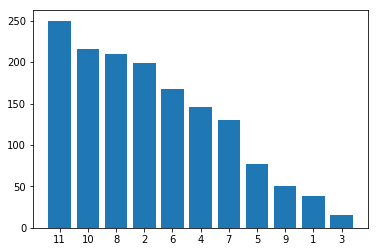

In [144]:
plt.bar(legend2, JSON_Data_chart['0_x'])
plt.xlabel('Codes')
plt.ylabel('# of projects')
plt.show()

In [99]:
#3 Redo in alternative method

In [100]:
JSON_data.head()

,name,code,0
0,Environment and natural resources management,11,223
1,Rural development,10,202
2,Human development,8,197
3,Public sector governance,2,184
4,Social protection and risk management,6,158


In [132]:
#Creating new df to manipulate
#Reseting index to call pandas functions on columns
JSON_Data_ffill = JSON_data
JSON_Data_ffill = JSON_Data_ffill.reset_index()
JSON_Data_ffill = JSON_Data_ffill.drop(['index'],axis=1)
JSON_Data_ffill.head()

,name,code,0
0,Environment and natural resources management,11,223
1,Rural development,10,202
2,Human development,8,197
3,Public sector governance,2,184
4,Social protection and risk management,6,158


In [102]:
#import numpy in order to leverage ffill
#sort values by code and name
import numpy as np
JSON_Data_ffill = JSON_Data_ffill.sort_values(['code','name'], ascending=False)
JSON_Data_ffill['name'] = JSON_Data_ffill['name'].replace('',np.nan)

In [133]:
#forwardfill values down
JSON_Data_ffill= JSON_Data_ffill.ffill(axis=0)

In [134]:
JSON_Data_ffill

,name,code,0
0,Environment and natural resources management,11,223
1,Rural development,10,202
2,Human development,8,197
3,Public sector governance,2,184
4,Social protection and risk management,6,158
5,Financial and private sector development,4,130
6,Social dev/gender/inclusion,7,119
7,Trade and integration,5,72
8,Urban development,9,47
9,Economic management,1,33


In [135]:
#group the data into new groups - amagimating the fowrward filled column
#reset index to turn grouped data in df for pandas methods
grouped_ffill_data = JSON_Data_ffill.groupby(['name','code']).sum()
grouped_ffill_data = grouped_ffill_data.reset_index()

In [136]:
#inspect the data
grouped_ffill_data.head(3)

,name,code,0
0,,1,5
1,,10,14
2,,11,27


In [137]:
#inspect the data
grouped_ffill_data[0]

0       5
1      14
2      27
3      15
4       3
5      16
6       5
7      10
8      11
9      13
10      3
11     33
12    223
13    130
14    197
15    184
16     12
17    202
18    119
19    158
20     72
21     47
Name: 0, dtype: int64

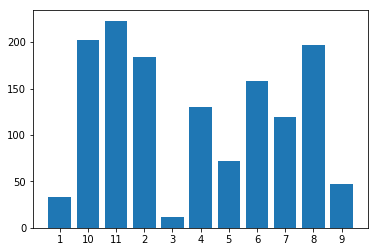

In [139]:
#plotting the new dataframe
plt.bar(grouped_ffill_data.code, grouped_ffill_data[0])
plt.xlabel=('Codes')
plt.show()